# myrun

This notebook imports the feature vector, merges it with the labelled data and then makes predictions on specified columns


In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
from functools import reduce

# Igel
from igel import Igel

# Compare Algorithms
import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
def clean_dataset(df):
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    df.replace(np.nan,0)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    df = df.replace(r'\D+', '', regex=True)
    return df
    #return df[indices_to_keep].astype(np.float64)


def clean_dataset_int(df):
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    df.replace(np.nan,0)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    df = df.replace(r'\D+', '', regex=True)
    return df[indices_to_keep].astype(np.float64)

In [3]:
# Set the column names
feature_vector_keys = ["timestamp", #0
                       "tweet_id",  
                       "positive_sentiment", 
                       "negative_sentiment", 
                       "numb_of_mentions", 
                       "numb_of_media",
                       "numb_of_urls", 
                       "numb_of_hashtags", 
                       "numb_of_personal_pronouns", 
                       "numb_of_present_tenses", 
                       "numb_of_past_tenses", #10 
                       #"sent_from_web",
                       "numb_of_named_entites",
                       "numb_of_weird_chars", 
                       "numb_of_questions", 
                       "numb_of_emoticons", 
                       "numb_of_swearing_words", 
                       "numb_of_slang_words", 
                       "numb_of_intensifiers", 
                       "tweet_length", 
                       "userFollowersCount",
                       "userFriendsCount", #20
                       "user_numb_of_tweets",
                       "user_list_count",
                       #"tfidf_fire",                      # old
                       "dict_precision",                  # measures against the keyword TFIDF
                       "dict_recall", 
                       "dict_f_measure",
                       "offset",
                       "weighted_length", # the overall length of the Tweet with code points weighted per the ranges
                       "permillage", # (indicates the proportion (per thousand) of the weighted length in comparison to the max weighted length.
                       "is_verified", # column 29  #30 Non-word-embedding-features (0-29)
                       "unknown1",
                       "unknown2",
                       "unknown3",
                       "wEmbed1",
                       "wEmbed2",
                       "wEmbed3",
                       "wEmbed4",
                       "wEmbed5",
                       "wEmbed6",
                       "wEmbed7",
                       "wEmbed8",
                       "wEmbed9",
                       "wEmbed10",
                       "wEmbed11",
                       "wEmbed12",
                       "wEmbed13",
                       "wEmbed14",
                       "wEmbed15",
                       "wEmbed16",
                       "wEmbed17",
                       "wEmbed18",
                       "wEmbed19",
                       "wEmbed20",
                       "wEmbed21",
                       "wEmbed22",
                       "wEmbed23",
                       "wEmbed24",
                       "wEmbed25",
                       "wEmbed26",
                       "wEmbed27",
                       "wEmbed28",
                       "wEmbed29",
                       "wEmbed30",
                       "wEmbed31",
                       "wEmbed32",
                       "wEmbed33",
                       "wEmbed34",
                       "wEmbed35",
                       "wEmbed36",
                       "wEmbed37",
                       "wEmbed38",
                       "wEmbed39",
                       "wEmbed40",
                       "wEmbed41",
                       "wEmbed42",
                       "wEmbed43",
                       "wEmbed44",
                       "wEmbed45",
                       "wEmbed46",
                       "wEmbed47",
                       "wEmbed48",
                       "wEmbed49",
                       "wEmbed51",
                       "wEmbed52",
                       "wEmbed53",
                       "wEmbed54",
                       "wEmbed55",
                       "wEmbed56",
                       "wEmbed57",
                       "wEmbed58",
                       "wEmbed59",
                       "wEmbed60",
                       "wEmbed61",
                       "wEmbed62",
                       "wEmbed63",
                       "wEmbed64",
                       "wEmbed65",
                       "wEmbed66",
                       "wEmbed67",
                       "wEmbed68",
                       "wEmbed69",
                       "wEmbed70",
                       "wEmbed71",
                       "wEmbed72",
                       "wEmbed73",
                       "wEmbed74",
                       "wEmbed75",
                       "wEmbed76",
                       "wEmbed77",
                       "wEmbed78",
                       "wEmbed79",
                       "wEmbed80",
                       "wEmbed81",
                       "wEmbed82",
                       "wEmbed83",
                       "wEmbed84",
                       "wEmbed85",
                       "wEmbed86",
                       "wEmbed87",
                       "wEmbed88",
                       "wEmbed89",
                       "wEmbed80",
                       "wEmbed91",
                       "wEmbed92",
                       "wEmbed93",
                       "wEmbed94",
                       "wEmbed95",
                       "wEmbed96",
                       "wEmbed97",
                       "wEmbed98",
                       "wEmbed99",
                       "wEmbed100"
                       "wEmbed101",
                       "wEmbed102",
                       "wEmbed103",
                       "wEmbed104",
                       "wEmbed105",
                       "wEmbed106",
                       "wEmbed107",
                       "wEmbed108",
                       "wEmbed109",
                       "wEmbed110",
                       "wEmbed111",
                       "wEmbed112",
                       "wEmbed113",
                       "wEmbed114",
                       "wEmbed115",
                       "wEmbed116",
                       "wEmbed117",
                       "wEmbed118",
                       "wEmbed119",
                       "wEmbed120",
                       "wEmbed121",
                       "wEmbed122",
                       "wEmbed123",
                       "wEmbed124",
                       "wEmbed125",
                       "wEmbed126",
                       "wEmbed127",
                       "wEmbed128",
                       "wEmbed129",
                       "wEmbed130",
                       "wEmbed131",
                       "wEmbed132",
                       "wEmbed133",
                       "wEmbed134",
                       "wEmbed135",
                       "wEmbed136",
                       "wEmbed137",
                       "wEmbed138",
                       "wEmbed139",
                       "wEmbed140",
                       "wEmbed141",
                       "wEmbed142",
                       "wEmbed143",
                       "wEmbed144",
                       "wEmbed145",
                       "wEmbed146",
                       "wEmbed147",
                       "wEmbed148",
                       "wEmbed149",
                       "wEmbed151",
                       "wEmbed152",
                       "wEmbed153",
                       "wEmbed154",
                       "wEmbed155",
                       "wEmbed156",
                       "wEmbed157",
                       "wEmbed158",
                       "wEmbed159",
                       "wEmbed160",
                       "wEmbed161",
                       "wEmbed162",
                       "wEmbed163",
                       "wEmbed164",
                       "wEmbed165",
                       "wEmbed166",
                       "wEmbed167",
                       "wEmbed168",
                       "wEmbed169",
                       "wEmbed170",
                       "wEmbed171",
                       "wEmbed172",
                       "wEmbed173",
                       "wEmbed174",
                       "wEmbed175",
                       "wEmbed176",
                       "wEmbed177",
                       "wEmbed178",
                       "wEmbed179",
                       "wEmbed180",
                       "wEmbed181",
                       "wEmbed182",
                       "wEmbed183",
                       "wEmbed184",
                       "wEmbed185",
                       "wEmbed186",
                       "wEmbed187",
                       "wEmbed188",
                       "wEmbed189",
                       "wEmbed180",
                       "wEmbed191",
                       "wEmbed192",
                       "wEmbed193",
                       "wEmbed194",
                       "wEmbed195",
                       "wEmbed196",
                       "wEmbed197",
                       "wEmbed198",
                       "wEmbed199",
                       "wEmbed200"
                       ]


priority_scorer = {
    '10' : 'Critical',
    '9' : 'Critical',
    '8' : 'Critical',
    '7' : 'High',
    '6' : 'High',
    '5' : 'Medium',
    '4' : 'Medium',
    '3' : 'Low',
    '2' : 'Low',
    '1.0' : 'Low',
    '0.0' : 'Low',
}

priority_mapping = {
    "Critical" : 10,
    "High" : 7.5,
    "Medium" : 5,
    "Low" : 2.5,
    "Unknown" : 0,
}

# What we consider to be highly important categories of information
highCategoriser = {
    0.0 : 'Other-Advice',
    1.0 : 'Other-Advice',
    2.0 : 'Report-CleanUp',
    3.0 : 'ContextualInformation',
    4.0 : 'Other-ContextualInformation',
    5.0 : 'CallToAction-Donations',
    6.0 : 'Report-EmergingThreats',
    7.0 : 'Report-Factoid',
    8.0 : 'Report-FirstPartyObservation',
    9.0 : 'Request-GoodsServices',
    10.0 : 'Report-Hashtags',
    11.0 : 'Request-InformationWanted',
    12.0 : 'Other-Irrelevant',
    13.0 : 'Report-Location',
    14.0 : 'CallToAction-MovePeople',
    15.0 : 'Report-MultimediaShare',
    16.0 : 'Report-NewSubEvent',
    17.0 : 'Report-News',
    18.0 : 'Report-Official',
    19.0 : 'Report-OriginalEvent',
    20.0 : 'Request-SearchAndRescue',
    21.0 : 'Other-Sentiment',
    22.0 : 'Report-ServiceAvailable',
    23.0 : 'Report-ThirdPartyObservation',
    24.0 : 'CallToAction-Volunteer',
    25.0 : 'Report-Weather',
    26.0 : 'hmm',
}

event_int_map =	{
  "guatemalaEarthquake2012": 7,
  "joplinTornado2011": 16,
  "athensEarthquake2020": 35,
  "baltimoreFlashFlood2020": 36,
  "brooklynBlockPartyShooting2020": 37,
  "daytonOhioShooting2020": 38,
  "elPasoWalmartShooting2020": 39,
  "gilroygarlicShooting2020": 40,
  "hurricaneBarry2020": 41,
  "indonesiaEarthquake2020": 42,
  "keralaFloods2020": 43,
  "myanmarFloods2020": 44,
  "papuaNewguineaEarthquake2020": 45,
  "siberianWildfires2020": 46,
  "typhoonKrosa2020": 47,
  "typhoonLekima2020": 48,
  "whaleyBridgeCollapse2020": 49
}

mymap = {'Advice':1, 'CleanUp':2, 'ContextualInformation':3, 'Discussion':4, 'Donations':5, 
        'EmergingThreats':6, 'Factoid':7, 'FirstPartyObservation':8, 'GoodsServices':9, 'Hashtags':10, 
        'InformationWanted':11,'Irrelevant':12, 'Location':13, 'MovePeople':14, 
         'MultimediaShare':15, 'NewSubEvent':16, 'News':17,
        'Official':18, 'OriginalEvent':19, 'SearchAndRescue':20, 'Sentiment':21, 'ServiceAvailable':22, 
         'ThirdPartyObservation':23,'Volunteer':24, 'Weather':25}

## Feature Vector

Load the feature vector in from Play

In [4]:
# Currently loading the feature vector from a .txt file exported from Play
feature_vector_input = pd.read_csv("../../../0-data/processed/new_with_offset.txt", sep=",", header=None, error_bad_lines=False)

# Remove superflous "]"
del feature_vector_input[130]

feature_vector_input

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230
0,[1.564909485E12,1.157940e+18,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,28.0,4993.0,5386.0,0.0,15.0,0.0,0.0,0.0,32666.0,53.0,189.0,0.0],[0.251939982175827,1.293229,-1.852462,0.139090,-1.052559,-0.178779,-1.774937,-1.015365,-0.813791,-0.060530,-0.834871,-1.532364,-0.162578,0.081977,1.202254,-0.637062,-1.767895,3.520400,-0.931232,0.437606,1.107728,11.595380,-0.734505,0.001621,1.776861,0.782251,-1.064290,-0.067711,-0.079490,0.840287,-0.358631,-0.551147,-0.213488,-0.058983,-0.048103,-1.255258,-1.747300,-0.642800,0.821896,0.672102,-2.672314,0.048642,0.763150,0.577042,-1.666129,1.186140,4.060010,-1.589674,0.379754,-0.069380,1.351030,2.340313,1.409774,2.679580,1.180821,-0.331164,0.206520,0.190840,-0.852821,0.551638,0.951668,-1.155737,-0.890047,0.373730,-1.075590,-0.374521,-0.182269,1.294283,2.281450,1.712750,3.528094,-1.386285,0.872640,-0.584683,-1.080700,0.628494,-0.813316,-0.098432,0.299261,0.615772,-0.862060,0.317026,-0.743180,1.409169,-0.639413,-0.433560,-3.224996,-2.018508,2.427901,-3.295990,0.716908,0.530026,0.978720,1.468987,-1.365905,0.627232,-0.073597,-2.093019,-0.276976,-0.752960,0.530320,0.273310,-0.322003,-0.024020,-1.044462,-0.130695,8.137680,-2.614590,1.798520,-0.582158,-1.486640,-0.599827,0.322640,-1.904471,-0.518565,0.293053,1.142556,-0.567503,-0.573657,1.625812,0.050317,1.767250,0.297431,0.920251,-2.845250,1.244242,0.485688,0.982368,-1.764699,-0.412789,0.253865,2.305777,0.202240,0.010300,0.691670,1.667666,-0.930608,-2.649370,0.279498,0.920358,-0.402760,0.949469,-1.330190,6.782570,1.410992,0.225740,-1.035907,-0.716688,1.853891,1.879046,1.154960,-1.046216,0.485855,0.548968,0.652879,-0.887009,-1.384200,-0.743563,-1.404382,0.960894,0.354643,-0.582104,-0.653740,-0.579480,-0.149045,-0.209026,1.678627,-0.143980,1.501890,-0.916100,-0.173684,1.302190,2.630060,0.460908,-0.275648,-1.013595,0.339003,-0.726440,0.129376,4.040440,-1.272458,-1.288190,1.321247,-0.231411,-2.150930,0.174180,0.624371,0.905223,-1.035502,-0.870426,0.548976,-0.279020,-0.524857,-1.605393,1.603642,-1.193885,1.076800,0.263650,1.120790,]
1,[1.565125769E12,1.158848e+18,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,11.0,1.0,0.0,0.0,0.0,0.0,48.0,11344.0,11196.0,0.0,217.0,0.0,0.0,0.0,248950.0,99.0,353.0,0.0],[0.9105161428451538,2.282449,-0.037060,-0.635917,0.319895,1.990668,-3.993180,-1.032466,1.815672,-1.078980,-0.306070,2.653399,-0.858531,1.383726,3.072958,0.954793,-0.096391,3.748377,0.141993,-1.457954,2.612790,24.139996,-3.047990,0.546623,0.959882,-0.932175,-1.513441,-0.249126,0.487426,-1.864793,-0.687501,0.869314,0.267842,0.232420,-0.709445,-2.127667,-5.213111,-3.401570,1.256494,0.722850,-2.733040,-0.659947,0.029084,3.639506,-1.478255,0.967306,4.346549,-1.341463,1.604956,-0.489725,0.770969,-0.280380,-0.239376,1.585059,1.927250,-0.228099,-1.850464,0.024784,-1.084589,0.937882,2.090708,-0.044908,-0.676564,-1.287342,0.560790,-0.024464,-0.462762,1.458787,1.344806,2.512259,3.176318,0.345264,0.212167,1.704069,-4.208464,1.921067,-2.094020,-0.354255,-1.664310,-0.889603,0.078596,-0.156533,0.875438,1.106032,-0.306068,-1.841150,-4.326050,-2.640629,3.618560,-6.242034,1.563542,1.709855,3.237846,-0.845200,-2.592074,2.779548,-0.622557,-1.210580,-2.147068,-1.957442

In [5]:
# Set the column names
feature_vector_input.columns = feature_vector_keys



feature_vector_input#.describe()

,timestamp,tweet_id,positive_sentiment,negative_sentiment,numb_of_mentions,numb_of_media,numb_of_urls,numb_of_hashtags,numb_of_personal_pronouns,numb_of_present_tenses,numb_of_past_tenses,numb_of_named_entites,numb_of_weird_chars,numb_of_questions,numb_of_emoticons,numb_of_swearing_words,numb_of_slang_words,numb_of_intensifiers,tweet_length,userFollowersCount,userFriendsCount,user_numb_of_tweets,user_list_count,dict_precision,dict_recall,dict_f_measure,offset,weighted_length,permillage,is_verified,unknown1,unknown2,unknown3,wEmbed1,wEmbed2,wEmbed3,wEmbed4,wEmbed5,wEmbed6,wEmbed7,wEmbed8,wEmbed9,wEmbed10,wEmbed11,wEmbed12,wEmbed13,wEmbed14,wEmbed15,wEmbed16,wEmbed17,wEmbed18,wEmbed19,wEmbed20,wEmbed21,wEmbed22,wEmbed23,wEmbed24,wEmbed25,wEmbed26,wEmbed27,wEmbed28,wEmbed29,wEmbed30,wEmbed31,wEmbed32,wEmbed33,wEmbed34,wEmbed35,wEmbed36,wEmbed37,wEmbed38,wEmbed39,wEmbed40,wEmbed41,wEmbed42,wEmbed43,wEmbed44,wEmbed45,wEmbed46,wEmbed47,wEmbed48,wEmbed49,wEmbed51,wEmbed52,wEmbed53,wEmbed54,wEmbed55,wEmbed56,wEmbed57,wEmbed58,wEmbed59,wEmbed60,wEmbed61,wEmbed62,wEmbed63,wEmbed64,wEmbed65,wEmbed66,wEmbed67,wEmbed68,wEmbed69,wEmbed70,wEmbed71,wEmbed72,wEmbed73,wEmbed74,wEmbed75,wEmbed76,wEmbed77,wEmbed78,wEmbed79,wEmbed80,wEmbed81,wEmbed82,wEmbed83,wEmbed84,wEmbed85,wEmbed86,wEmbed87,wEmbed88,wEmbed89,wEmbed80,wEmbed91,wEmbed92,wEmbed93,wEmbed94,wEmbed95,wEmbed96,wEmbed97,wEmbed98,wEmbed99,wEmbed100wEmbed101,wEmbed102,wEmbed103,wEmbed104,wEmbed105,wEmbed106,wEmbed107,wEmbed108,wEmbed109,wEmbed110,wEmbed111,wEmbed112,wEmbed113,wEmbed114,wEmbed115,wEmbed116,wEmbed117,wEmbed118,wEmbed119,wEmbed120,wEmbed121,wEmbed122,wEmbed123,wEmbed124,wEmbed125,wEmbed126,wEmbed127,wEmbed128,wEmbed129,wEmbed130,wEmbed131,wEmbed132,wEmbed133,wEmbed134,wEmbed135,wEmbed136,wEmbed137,wEmbed138,wEmbed139,wEmbed140,wEmbed141,wEmbed142,wEmbed143,wEmbed144,wEmbed145,wEmbed146,wEmbed147,wEmbed148,wEmbed149,wEmbed151,wEmbed152,wEmbed153,wEmbed154,wEmbed155,wEmbed156,wEmbed157,wEmbed158,wEmbed159,wEmbed160,wEmbed161,wEmbed162,wEmbed163,wEmbed164,wEmbed165,wEmbed166,wEmbed167,wEmbed168,wEmbed169,wEmbed170,wEmbed171,wEmbed172,wEmbed173,wEmbed174,wEmbed175,wEmbed176,wEmbed177,wEmbed178,wEmbed179,wEmbed180,wEmbed181,wEmbed182,wEmbed183,wEmbed184,wEmbed185,wEmbed186,wEmbed187,wEmbed188,wEmbed189,wEmbed180,wEmbed191,wEmbed192,wEmbed193,wEmbed194,wEmbed195,wEmbed196,wEmbed197,wEmbed198,wEmbed199,wEmbed200
0,[1.564909485E12,1.157940e+18,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,28.0,4993.0,5386.0,0.0,15.0,0.0,0.0,0.0,32666.0,53.0,189.0,0.0],[0.251939982175827,1.293229,-1.852462,0.139090,-1.052559,-0.178779,-1.774937,-1.015365,-0.813791,-0.060530,-0.834871,-1.532364,-0.162578,0.081977,1.202254,-0.637062,-1.767895,3.520400,-0.931232,0.437606,1.107728,11.595380,-0.734505,0.001621,1.776861,0.782251,-1.064290,-0.067711,-0.079490,0.840287,-0.358631,-0.551147,-0.213488,-0.058983,-0.048103,-1.255258,-1.747300,-0.642800,0.821896,0.672102,-2.672314,0.048642,0.763150,0.577042,-1.666129,1.186140,4.060010,-1.589674,0.379754,-0.069380,1.351030,2.340313,1.409774,2.679580,1.180821,-0.331164,0.206520,0.190840,-0.852821,0.551638,0.951668,-1.155737,-0.890047,0.373730,-1.075590,-0.374521,-0.182269,1.294283,2.281450,1.712750,3.528094,-1.386285,0.872640,-0.584683,-1.080700,0.628494,-0.813316,-0.098432,0.299261,0.615772,-0.862060,0.317026,-0.743180,1.409169,-0.639413,-0.433560,-3.224996,-2.018508,2.427901,-3.295990,0.716908,0.530026,0.978720,1.468987,-1.365905,0.627232,-0.073597,-2.093019,-0.276976,-0.752960,0.530320,0.273310,-0.322003,-0.024020,-1.044462,-0.130695,8.137680,-2.614590,1.798520,-0.582158,-1.486640,-0.599827,0.322640,-1.904471,-0.518565,0.293053,1.142556,-0.567503,-0.573657,1.625812,0.050317,1.767250,0.297431,0.920251,-2.845250,1.244242,0.485688,0.982368,-1.764699,-0.412789,0.253865,2.305777,0.202240,0.010300,0.691670,1.667666,-0.930608,-2.649370,0.279498,0.920358,-0.402760,0.949469,-1.330190,6.782570,1.410992,0.225740,-1.035907,-0.716688,1.853891,1.879046,1.15

In [6]:
# Group by tweet
feature_vector_input = feature_vector_input.groupby(['tweet_id']).agg('first')

# Reset the index
feature_vector_input.reset_index(level=0, inplace=True)

# Create a numeric version for our model
feature_vector_input = clean_dataset(feature_vector_input)



In [7]:
# Remove superflous "]"
del feature_vector_input["wEmbed200"]

# Create a numeric version for our model
feature_vector_input = clean_dataset_int(feature_vector_input)

feature_vector_input#.describe()

,tweet_id,timestamp,positive_sentiment,negative_sentiment,numb_of_mentions,numb_of_media,numb_of_urls,numb_of_hashtags,numb_of_personal_pronouns,numb_of_present_tenses,numb_of_past_tenses,numb_of_named_entites,numb_of_weird_chars,numb_of_questions,numb_of_emoticons,numb_of_swearing_words,numb_of_slang_words,numb_of_intensifiers,tweet_length,userFollowersCount,userFriendsCount,user_numb_of_tweets,user_list_count,dict_precision,dict_recall,dict_f_measure,offset,weighted_length,permillage,is_verified,unknown1,unknown2,unknown3,wEmbed1,wEmbed2,wEmbed3,wEmbed4,wEmbed5,wEmbed6,wEmbed7,wEmbed8,wEmbed9,wEmbed10,wEmbed11,wEmbed12,wEmbed13,wEmbed14,wEmbed15,wEmbed16,wEmbed17,wEmbed18,wEmbed19,wEmbed20,wEmbed21,wEmbed22,wEmbed23,wEmbed24,wEmbed25,wEmbed26,wEmbed27,wEmbed28,wEmbed29,wEmbed30,wEmbed31,wEmbed32,wEmbed33,wEmbed34,wEmbed35,wEmbed36,wEmbed37,wEmbed38,wEmbed39,wEmbed40,wEmbed41,wEmbed42,wEmbed43,wEmbed44,wEmbed45,wEmbed46,wEmbed47,wEmbed48,wEmbed49,wEmbed51,wEmbed52,wEmbed53,wEmbed54,wEmbed55,wEmbed56,wEmbed57,wEmbed58,wEmbed59,wEmbed60,wEmbed61,wEmbed62,wEmbed63,wEmbed64,wEmbed65,wEmbed66,wEmbed67,wEmbed68,wEmbed69,wEmbed70,wEmbed71,wEmbed72,wEmbed73,wEmbed74,wEmbed75,wEmbed76,wEmbed77,wEmbed78,wEmbed79,wEmbed80,wEmbed81,wEmbed82,wEmbed83,wEmbed84,wEmbed85,wEmbed86,wEmbed87,wEmbed88,wEmbed89,wEmbed80,wEmbed91,wEmbed92,wEmbed93,wEmbed94,wEmbed95,wEmbed96,wEmbed97,wEmbed98,wEmbed99,wEmbed100wEmbed101,wEmbed102,wEmbed103,wEmbed104,wEmbed105,wEmbed106,wEmbed107,wEmbed108,wEmbed109,wEmbed110,wEmbed111,wEmbed112,wEmbed113,wEmbed114,wEmbed115,wEmbed116,wEmbed117,wEmbed118,wEmbed119,wEmbed120,wEmbed121,wEmbed122,wEmbed123,wEmbed124,wEmbed125,wEmbed126,wEmbed127,wEmbed128,wEmbed129,wEmbed130,wEmbed131,wEmbed132,wEmbed133,wEmbed134,wEmbed135,wEmbed136,wEmbed137,wEmbed138,wEmbed139,wEmbed140,wEmbed141,wEmbed142,wEmbed143,wEmbed144,wEmbed145,wEmbed146,wEmbed147,wEmbed148,wEmbed149,wEmbed151,wEmbed152,wEmbed153,wEmbed154,wEmbed155,wEmbed156,wEmbed157,wEmbed158,wEmbed159,wEmbed160,wEmbed161,wEmbed162,wEmbed163,wEmbed164,wEmbed165,wEmbed166,wEmbed167,wEmbed168,wEmbed169,wEmbed170,wEmbed171,wEmbed172,wEmbed173,wEmbed174,wEmbed175,wEmbed176,wEmbed177,wEmbed178,wEmbed179,wEmbed180,wEmbed181,wEmbed182,wEmbed183,wEmbed184,wEmbed185,wEmbed186,wEmbed187,wEmbed188,wEmbed189,wEmbed180,wEmbed191,wEmbed192,wEmbed193,wEmbed194,wEmbed195,wEmbed196,wEmbed197,wEmbed198,wEmbed199
0,1.147938e+18,1.562525e+11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,75.0,0.0,0.0,0.0,0.0,0.0,276.0,51.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,277.0,989.0,0.0,9.320729e+14,12.780931,-10.882844,-13.708915,-2.587895,5.880577,-2.675750,-13.336211,-2.987180,-1.220445,5.340559,0.668399,-0.192585,-4.199424,21.085272,8.906733,-2.458632,12.380885,-2.444577,-9.418728,3.227195,106.139793,-6.703590,-4.928936,1.587535,4.815655,-7.630097,8.499638,-6.261263,9.502237,8.461645,1.908123,-3.293442,5.672998,3.934684,-7.987103,-24.599222,-10.550898,-0.234585,-1.031240,2.497635,-1.491065,1.012578,6.612347,3.314426,13.093377,3.941468,1.413224,-0.495266,6.653540,2.110763,-5.373922,-2.408523,20.335920,-5.415851,-4.635975,-5.115654,9.183359,1.026919,-0.014104,3.223820,0.581827,-1.548575,-6.940229,-0.276264,-3.647830,-3.650439,4.818009,7.486620,-2.590390,5.068946,-5.891718,9.353780,4.877253,10.332611,24.015541,-1.281516,7.070378,5.920894,-4.679185,-6.102385,-2.229264,-9.769045,5.826933,-4.905653,-0.117039,-5.496512,-17.504259,14.628503,-8.211085,-7.190164,10.808208,6.629757,-5.004408,-5.746145,-2.300270,-4.464097,-7.799471,3.741283,-9.507647,0.968051,12.738877,8.726773,-10.582164,-5.174330,8.215934,40.273430,-5.661682,-3.795028,-7.004704,-7.903213,11.195045,13.005518,2.662097,-6.448723,3.306827,-0.567655,-2.103801,-3.627195,-4.514118,-7.935409,7.989872,4.204024,19.181622,-32.000393,4.524370,-2.686850,8.743446,-5.980742,2.308214,-5.549137,9.749986,-18.131767,4.278541,0.870699,5.994455,-6.662307,-1.386873,11.667277,-4.084481,-6.484860,-1.960204,2.117121,47.765194,12.965762,-6.105628,-3.779075,0.093661,2.366508,16.31529

## Load the labelled data

These are generated in 0_Labels.ipynb

In [8]:
# dtypes needs to be specified or long ints will change
labels_df = pd.read_json("../../../0-data/raw/data/2020/2020-A/labels/TRECIS-2018-2020A-labels.json", dtype={} )

# replace the event with a numeric value
labels_df = labels_df.replace({'eventID': event_int_map})

# Count the number of labels
labels_df['num'] = labels_df['postCategories'].str.len()


# Map the priority to a numeric value
labels_df = labels_df.replace({"postPriority": priority_mapping})

# Split categories and map to numeric values
category_list = pd.DataFrame(labels_df["postCategories"].to_list(), columns=['cat1', 'cat2', 'cat3',
                                                                   'cat4', 'cat5', 'cat6',
                                                                   'cat7', 'cat8', 'cat9', 'cat10'])


# Map the categories to numeric values
category_list = category_list.applymap(lambda s: mymap.get(s) if s in mymap else s)


# Join back onto our original list
labels = labels_df.join(category_list)

# Drop the string categories
labels.drop(['postCategories'], axis = 1, inplace = True)

# Tidy
labels = labels.drop(['eventName', 'eventDescription', 'eventType'], axis=1)


# Fill the NaN slots with 0
labels = labels.fillna("0")

# Export
labels.to_csv("../labels.csv", index=False)

labels = clean_dataset_int(labels)

labels

,eventID,postID,postPriority,num,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10
0,16.0,7.267628e+16,2.5,3.0,7.0,10.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16.0,7.267840e+16,10.0,4.0,22.0,18.0,10.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16.0,7.268240e+16,2.5,2.0,21.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16.0,7.269393e+16,5.0,3.0,23.0,10.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,16.0,7.269856e+16,2.5,3.0,23.0,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42946,47.0,1.162000e+18,2.5,1.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42947,47.0,1.162005e+18,2.5,3.0,13.0,15.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42948,47.0,1.162005e+18,2.5,2.0,13.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42949,47.0,1.162006e+18,2.5,3.0,13.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Train.csv


Merges the input feature vector with the labels

In [9]:
#dfs = [labels, feature_vector_input]
#train = reduce(lambda left,right: pd.merge(left = 'tweet_id', right = 'postID'), dfs)

train = pd.merge(labels, feature_vector_input, left_on = 'postID', right_on = 'tweet_id', how = 'inner')

train.to_csv("../train.csv", index=False)

train

,eventID,postID,postPriority,num,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,tweet_id,timestamp,positive_sentiment,negative_sentiment,numb_of_mentions,numb_of_media,numb_of_urls,numb_of_hashtags,numb_of_personal_pronouns,numb_of_present_tenses,numb_of_past_tenses,numb_of_named_entites,numb_of_weird_chars,numb_of_questions,numb_of_emoticons,numb_of_swearing_words,numb_of_slang_words,numb_of_intensifiers,tweet_length,userFollowersCount,userFriendsCount,user_numb_of_tweets,user_list_count,dict_precision,dict_recall,dict_f_measure,offset,weighted_length,permillage,is_verified,unknown1,unknown2,unknown3,wEmbed1,wEmbed2,wEmbed3,wEmbed4,wEmbed5,wEmbed6,wEmbed7,wEmbed8,wEmbed9,wEmbed10,wEmbed11,wEmbed12,wEmbed13,wEmbed14,wEmbed15,wEmbed16,wEmbed17,wEmbed18,wEmbed19,wEmbed20,wEmbed21,wEmbed22,wEmbed23,wEmbed24,wEmbed25,wEmbed26,wEmbed27,wEmbed28,wEmbed29,wEmbed30,wEmbed31,wEmbed32,wEmbed33,wEmbed34,wEmbed35,wEmbed36,wEmbed37,wEmbed38,wEmbed39,wEmbed40,wEmbed41,wEmbed42,wEmbed43,wEmbed44,wEmbed45,wEmbed46,wEmbed47,wEmbed48,wEmbed49,wEmbed51,wEmbed52,wEmbed53,wEmbed54,wEmbed55,wEmbed56,wEmbed57,wEmbed58,wEmbed59,wEmbed60,wEmbed61,wEmbed62,wEmbed63,wEmbed64,wEmbed65,wEmbed66,wEmbed67,wEmbed68,wEmbed69,wEmbed70,wEmbed71,wEmbed72,wEmbed73,wEmbed74,wEmbed75,wEmbed76,wEmbed77,wEmbed78,wEmbed79,wEmbed80,wEmbed81,wEmbed82,wEmbed83,wEmbed84,wEmbed85,wEmbed86,wEmbed87,wEmbed88,wEmbed89,wEmbed80,wEmbed91,wEmbed92,wEmbed93,wEmbed94,wEmbed95,wEmbed96,wEmbed97,wEmbed98,wEmbed99,wEmbed100wEmbed101,wEmbed102,wEmbed103,wEmbed104,wEmbed105,wEmbed106,wEmbed107,wEmbed108,wEmbed109,wEmbed110,wEmbed111,wEmbed112,wEmbed113,wEmbed114,wEmbed115,wEmbed116,wEmbed117,wEmbed118,wEmbed119,wEmbed120,wEmbed121,wEmbed122,wEmbed123,wEmbed124,wEmbed125,wEmbed126,wEmbed127,wEmbed128,wEmbed129,wEmbed130,wEmbed131,wEmbed132,wEmbed133,wEmbed134,wEmbed135,wEmbed136,wEmbed137,wEmbed138,wEmbed139,wEmbed140,wEmbed141,wEmbed142,wEmbed143,wEmbed144,wEmbed145,wEmbed146,wEmbed147,wEmbed148,wEmbed149,wEmbed151,wEmbed152,wEmbed153,wEmbed154,wEmbed155,wEmbed156,wEmbed157,wEmbed158,wEmbed159,wEmbed160,wEmbed161,wEmbed162,wEmbed163,wEmbed164,wEmbed165,wEmbed166,wEmbed167,wEmbed168,wEmbed169,wEmbed170,wEmbed171,wEmbed172,wEmbed173,wEmbed174,wEmbed175,wEmbed176,wEmbed177,wEmbed178,wEmbed179,wEmbed180,wEmbed181,wEmbed182,wEmbed183,wEmbed184,wEmbed185,wEmbed186,wEmbed187,wEmbed188,wEmbed189,wEmbed180,wEmbed191,wEmbed192,wEmbed193,wEmbed194,wEmbed195,wEmbed196,wEmbed197,wEmbed198,wEmbed199
0,41.0,1.148275e+18,5.0,7.0,23.0,13.0,6.0,7.0,18.0,17.0,3.0,0.0,0.0,0.0,1.148275e+18,1.562605e+11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,79.0,0.0,0.0,0.0,0.0,0.0,276.0,51.0,12.0,0.0,0.0,0.0,0.0,0.0,80388.0,277.0,989.0,0.0,8.790084e+15,13.316628,-13.175664,-15.110274,-2.387172,6.441364,-3.011200,-13.559424,-3.555943,0.467833,5.382294,2.664192,1.538937,-3.955093,21.384249,9.158663,-2.045525,12.149871,-2.215693,-10.326367,3.116764,106.480370,-8.037522,-5.775463,1.678094,4.572027,-9.139133,8.420811,-3.166511,8.316787,7.826318,0.010423,-3.275065,3.968238,3.124573,-9.729921,-26.330265,-8.476663,-0.089073,0.570897,4.380184,-3.073052,0.881720,6.641609,4.952452,11.657008,5.359411,2.896944,0.453031,6.348515,2.044710,-5.650830,-3.198289,17.246481,-4.872058,-2.818372,-3.533647,6.998888,0.903750,-0.558657,3.839808,0.333173,-3.038387,-7.523818,0.393875,-3.766695,-5.590526,4.417358,5.417887,-0.940420,4.108861,-5.116901,8.395240,4.656587,9.143810,23.755981,-1.011286,6.456321,6.741706,-4.393105,-4.707616,-1.899176,-11.148238,5.515308,-5.268919,0.410987,-5.315962,-17.678499,13.972813,-8.566756,-6.909744,10.147423,7.187370,-5.447982,-5.905247,-0.140987,-2.429842,-8.267911,2.712351,-8.546021,0.064488,11.086278,7.271743,-8.796841,-3.251208,8.069006,42.092503,-6.640301,-2.009610,-6.436870,-7.743443,10.095718,12.892474,3.020970,-5.928570,2.099557,0.789469,-0.986818,-4.445679,-3.930367,-6.663901,8.280357,1.969319,18.978573,-32.801170,3.946563,-1.445628,7.373544,-7.243427,1.349801,-3.710383,10.303541,-18.429956,5.233354,2.2

# Test.csv


Drops the categories, number of categories and priority so we can make our prediction

In [10]:
test = train

# Drop cat*
test.drop(list(test.filter(regex = 'cat')), axis = 1, inplace = True)

# Drop priority / num (of labels)
test.drop(['postPriority', 'num'], axis = 1, inplace = True)

# export
test.to_csv("../test.csv", index=False)

test

,eventID,postID,tweet_id,timestamp,positive_sentiment,negative_sentiment,numb_of_mentions,numb_of_media,numb_of_urls,numb_of_hashtags,numb_of_personal_pronouns,numb_of_present_tenses,numb_of_past_tenses,numb_of_named_entites,numb_of_weird_chars,numb_of_questions,numb_of_emoticons,numb_of_swearing_words,numb_of_slang_words,numb_of_intensifiers,tweet_length,userFollowersCount,userFriendsCount,user_numb_of_tweets,user_list_count,dict_precision,dict_recall,dict_f_measure,offset,weighted_length,permillage,is_verified,unknown1,unknown2,unknown3,wEmbed1,wEmbed2,wEmbed3,wEmbed4,wEmbed5,wEmbed6,wEmbed7,wEmbed8,wEmbed9,wEmbed10,wEmbed11,wEmbed12,wEmbed13,wEmbed14,wEmbed15,wEmbed16,wEmbed17,wEmbed18,wEmbed19,wEmbed20,wEmbed21,wEmbed22,wEmbed23,wEmbed24,wEmbed25,wEmbed26,wEmbed27,wEmbed28,wEmbed29,wEmbed30,wEmbed31,wEmbed32,wEmbed33,wEmbed34,wEmbed35,wEmbed36,wEmbed37,wEmbed38,wEmbed39,wEmbed40,wEmbed41,wEmbed42,wEmbed43,wEmbed44,wEmbed45,wEmbed46,wEmbed47,wEmbed48,wEmbed49,wEmbed51,wEmbed52,wEmbed53,wEmbed54,wEmbed55,wEmbed56,wEmbed57,wEmbed58,wEmbed59,wEmbed60,wEmbed61,wEmbed62,wEmbed63,wEmbed64,wEmbed65,wEmbed66,wEmbed67,wEmbed68,wEmbed69,wEmbed70,wEmbed71,wEmbed72,wEmbed73,wEmbed74,wEmbed75,wEmbed76,wEmbed77,wEmbed78,wEmbed79,wEmbed80,wEmbed81,wEmbed82,wEmbed83,wEmbed84,wEmbed85,wEmbed86,wEmbed87,wEmbed88,wEmbed89,wEmbed80,wEmbed91,wEmbed92,wEmbed93,wEmbed94,wEmbed95,wEmbed96,wEmbed97,wEmbed98,wEmbed99,wEmbed100wEmbed101,wEmbed102,wEmbed103,wEmbed104,wEmbed105,wEmbed106,wEmbed107,wEmbed108,wEmbed109,wEmbed110,wEmbed111,wEmbed112,wEmbed113,wEmbed114,wEmbed115,wEmbed116,wEmbed117,wEmbed118,wEmbed119,wEmbed120,wEmbed121,wEmbed122,wEmbed123,wEmbed124,wEmbed125,wEmbed126,wEmbed127,wEmbed128,wEmbed129,wEmbed130,wEmbed131,wEmbed132,wEmbed133,wEmbed134,wEmbed135,wEmbed136,wEmbed137,wEmbed138,wEmbed139,wEmbed140,wEmbed141,wEmbed142,wEmbed143,wEmbed144,wEmbed145,wEmbed146,wEmbed147,wEmbed148,wEmbed149,wEmbed151,wEmbed152,wEmbed153,wEmbed154,wEmbed155,wEmbed156,wEmbed157,wEmbed158,wEmbed159,wEmbed160,wEmbed161,wEmbed162,wEmbed163,wEmbed164,wEmbed165,wEmbed166,wEmbed167,wEmbed168,wEmbed169,wEmbed170,wEmbed171,wEmbed172,wEmbed173,wEmbed174,wEmbed175,wEmbed176,wEmbed177,wEmbed178,wEmbed179,wEmbed180,wEmbed181,wEmbed182,wEmbed183,wEmbed184,wEmbed185,wEmbed186,wEmbed187,wEmbed188,wEmbed189,wEmbed180,wEmbed191,wEmbed192,wEmbed193,wEmbed194,wEmbed195,wEmbed196,wEmbed197,wEmbed198,wEmbed199
0,41.0,1.148275e+18,1.148275e+18,1.562605e+11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,79.0,0.0,0.0,0.0,0.0,0.0,276.0,51.0,12.0,0.0,0.0,0.0,0.0,0.0,80388.0,277.0,989.0,0.0,8.790084e+15,13.316628,-13.175664,-15.110274,-2.387172,6.441364,-3.011200,-13.559424,-3.555943,0.467833,5.382294,2.664192,1.538937,-3.955093,21.384249,9.158663,-2.045525,12.149871,-2.215693,-10.326367,3.116764,106.480370,-8.037522,-5.775463,1.678094,4.572027,-9.139133,8.420811,-3.166511,8.316787,7.826318,0.010423,-3.275065,3.968238,3.124573,-9.729921,-26.330265,-8.476663,-0.089073,0.570897,4.380184,-3.073052,0.881720,6.641609,4.952452,11.657008,5.359411,2.896944,0.453031,6.348515,2.044710,-5.650830,-3.198289,17.246481,-4.872058,-2.818372,-3.533647,6.998888,0.903750,-0.558657,3.839808,0.333173,-3.038387,-7.523818,0.393875,-3.766695,-5.590526,4.417358,5.417887,-0.940420,4.108861,-5.116901,8.395240,4.656587,9.143810,23.755981,-1.011286,6.456321,6.741706,-4.393105,-4.707616,-1.899176,-11.148238,5.515308,-5.268919,0.410987,-5.315962,-17.678499,13.972813,-8.566756,-6.909744,10.147423,7.187370,-5.447982,-5.905247,-0.140987,-2.429842,-8.267911,2.712351,-8.546021,0.064488,11.086278,7.271743,-8.796841,-3.251208,8.069006,42.092503,-6.640301,-2.009610,-6.436870,-7.743443,10.095718,12.892474,3.020970,-5.928570,2.099557,0.789469,-0.986818,-4.445679,-3.930367,-6.663901,8.280357,1.969319,18.978573,-32.801170,3.946563,-1.445628,7.373544,-7.243427,1.349801,-3.710383,10.303541,-18.429956,5.233354,2.219244,5.626327,-5.150867,0.244709,12.035684,-3.676510,-5.710592,-1.594864,2.061659,50.380733,12.904724,-5.806196,-2.7293

## Igel

This notebook implements `Igel`

> Igel supports all sklearn's machine learning functionality,

Igel's supported models:

        +--------------------+----------------------------+-------------------------+
        |      regression    |        classification      |        clustering       |
        +--------------------+----------------------------+-------------------------+
        |   LinearRegression |         LogisticRegression |                  KMeans |
        |              Lasso |                      Ridge |     AffinityPropagation |
        |          LassoLars |               DecisionTree |                   Birch |
        | BayesianRegression |                  ExtraTree | AgglomerativeClustering |
        |    HuberRegression |               RandomForest |    FeatureAgglomeration |
        |              Ridge |                 ExtraTrees |                  DBSCAN |
        |  PoissonRegression |                        SVM |         MiniBatchKMeans |
        |      ARDRegression |                  LinearSVM |    SpectralBiclustering |
        |  TweedieRegression |                      NuSVM |    SpectralCoclustering |
        | TheilSenRegression |            NearestNeighbor |      SpectralClustering |
        |    GammaRegression |              NeuralNetwork |               MeanShift |
        |   RANSACRegression | PassiveAgressiveClassifier |                  OPTICS |
        |       DecisionTree |                 Perceptron |                    ---- |
        |          ExtraTree |               BernoulliRBM |                    ---- |
        |       RandomForest |           BoltzmannMachine |                    ---- |
        |         ExtraTrees |       CalibratedClassifier |                    ---- |
        |                SVM |                   Adaboost |                    ---- |
        |          LinearSVM |                    Bagging |                    ---- |
        |              NuSVM |           GradientBoosting |                    ---- |
        |    NearestNeighbor |        BernoulliNaiveBayes |                    ---- |
        |      NeuralNetwork |      CategoricalNaiveBayes |                    ---- |
        |         ElasticNet |       ComplementNaiveBayes |                    ---- |
        |       BernoulliRBM |         GaussianNaiveBayes |                    ---- |
        |   BoltzmannMachine |      MultinomialNaiveBayes |                    ---- |
        |           Adaboost |                       ---- |                    ---- |
        |            Bagging |                       ---- |                    ---- |
        |   GradientBoosting |                       ---- |                    ---- |
        +--------------------+----------------------------+-------------------------+

### Fit



In [11]:
params = {
        'cmd': 'fit',    
        'data_path': "../train.csv",
        'yaml_path': 'yaml/multi.yaml'  # DecisionTree
}

Igel(**params)

INFO - Entered CLI args: {'cmd': 'fit', 'data_path': '../train.csv', 'yaml_path': 'yaml/multi.yaml'}
INFO - Executing command: fit ...
INFO - reading data from ../train.csv
INFO - You passed the configurations as a yaml file.
INFO - your chosen configuration: {'dataset': {'split': {'test_size': 0.2, 'shuffle': True, 'stratify': 'default', 'scale': {'method': 'standard', 'target': 'inputs'}}}, 'model': {'type': 'regression', 'algorithm': 'DecisionTree'}, 'target': ['postPriority', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'num']}
INFO - dataset_props: {'split': {'test_size': 0.2, 'shuffle': True, 'stratify': 'default', 'scale': {'method': 'standard', 'target': 'inputs'}}} 
model_props: {'type': 'regression', 'algorithm': 'DecisionTree'} 
 target: ['postPriority', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'num'] 

INFO - dataset shape: (3406, 243)
INFO - dataset attributes: ['eventID', 'postID', 'postPriority',

### Evaluate



In [12]:
params = {
        'cmd': 'evaluate',    
        'data_path': "../train.csv",
        'yaml_path': 'yaml/hyper.yaml'
} 
Igel(**params)

INFO - Entered CLI args: {'cmd': 'evaluate', 'data_path': '../train.csv', 'yaml_path': 'yaml/hyper.yaml'}
INFO - Executing command: evaluate ...
INFO - reading data from ../train.csv
INFO - path of the pre-fitted model => /Users/mark/Uni/Project/HelpMe/1-src/2-python/1-notebooks/model_results/model.sav
INFO - result path: /Users/mark/Uni/Project/HelpMe/1-src/2-python/1-notebooks/model_results 
INFO - loading model form /Users/mark/Uni/Project/HelpMe/1-src/2-python/1-notebooks/model_results/model.sav 
INFO - dataset shape: (3406, 243)
INFO - dataset attributes: ['eventID', 'postID', 'postPriority', 'num', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'tweet_id', 'timestamp', 'positive_sentiment', 'negative_sentiment', 'numb_of_mentions', 'numb_of_media', 'numb_of_urls', 'numb_of_hashtags', 'numb_of_personal_pronouns', 'numb_of_present_tenses', 'numb_of_past_tenses', 'numb_of_named_entites', 'numb_of_weird_chars', 'numb_of_questions', 'numb_of_emoticons

### Predict



In [13]:
params = {
        'cmd': 'predict',    
        'data_path': "../test.csv",
        'yaml_path': 'yaml/hyper.yaml'
}
Igel(**params)

INFO - Entered CLI args: {'cmd': 'predict', 'data_path': '../test.csv', 'yaml_path': 'yaml/hyper.yaml'}
INFO - Executing command: predict ...
INFO - reading data from ../test.csv
INFO - path of the pre-fitted model => /Users/mark/Uni/Project/HelpMe/1-src/2-python/1-notebooks/model_results/model.sav
INFO - loading from /Users/mark/Uni/Project/HelpMe/1-src/2-python/1-notebooks/model_results/model.sav
INFO - dataset shape: (3406, 231)
INFO - dataset attributes: ['eventID', 'postID', 'tweet_id', 'timestamp', 'positive_sentiment', 'negative_sentiment', 'numb_of_mentions', 'numb_of_media', 'numb_of_urls', 'numb_of_hashtags', 'numb_of_personal_pronouns', 'numb_of_present_tenses', 'numb_of_past_tenses', 'numb_of_named_entites', 'numb_of_weird_chars', 'numb_of_questions', 'numb_of_emoticons', 'numb_of_swearing_words', 'numb_of_slang_words', 'numb_of_intensifiers', 'tweet_length', 'userFollowersCount', 'userFriendsCount', 'user_numb_of_tweets', 'user_list_count', 'dict_precision', 'dict_recall',

## View the predictions

In [14]:
predictions = pd.read_csv("model_results/predictions.csv")
predictions

def is_neg_predictions(predictions):
    predictions = predictions.sort_values(by=['postPriority'])
    predictions = predictions[(predictions > 0).all(1)]
    predictions.round()
    
#is_neg_predictions(predictions)

### Merge the new predictions back onto dataframe with the missing columns

In [15]:
# Map the labels to their High Level Information Types
cat_list = predictions.filter(regex='cat', axis=1).round().applymap(lambda x: highCategoriser[x])
predictions = cat_list.combine_first(predictions)

# Merge the predictions back into the training set
df = test.merge(predictions, left_index=True, right_index=True)
df.describe()

INFO - NumExpr defaulting to 8 threads.


,eventID,postID,tweet_id,timestamp,positive_sentiment,negative_sentiment,numb_of_mentions,numb_of_media,numb_of_urls,numb_of_hashtags,numb_of_personal_pronouns,numb_of_present_tenses,numb_of_past_tenses,numb_of_named_entites,numb_of_weird_chars,numb_of_questions,numb_of_emoticons,numb_of_swearing_words,numb_of_slang_words,numb_of_intensifiers,tweet_length,userFollowersCount,userFriendsCount,user_numb_of_tweets,user_list_count,dict_precision,dict_recall,dict_f_measure,offset,weighted_length,permillage,is_verified,unknown1,unknown2,unknown3,wEmbed1,wEmbed2,wEmbed3,wEmbed4,wEmbed5,wEmbed6,wEmbed7,wEmbed8,wEmbed9,wEmbed10,wEmbed11,wEmbed12,wEmbed13,wEmbed14,wEmbed15,wEmbed16,wEmbed17,wEmbed18,wEmbed19,wEmbed20,wEmbed21,wEmbed22,wEmbed23,wEmbed24,wEmbed25,wEmbed26,wEmbed27,wEmbed28,wEmbed29,wEmbed30,wEmbed31,wEmbed32,wEmbed33,wEmbed34,wEmbed35,wEmbed36,wEmbed37,wEmbed38,wEmbed39,wEmbed40,wEmbed41,wEmbed42,wEmbed43,wEmbed44,wEmbed45,wEmbed46,wEmbed47,wEmbed48,wEmbed49,wEmbed51,wEmbed52,wEmbed53,wEmbed54,wEmbed55,wEmbed56,wEmbed57,wEmbed58,wEmbed59,wEmbed60,wEmbed61,wEmbed62,wEmbed63,wEmbed64,wEmbed65,wEmbed66,wEmbed67,wEmbed68,wEmbed69,wEmbed70,wEmbed71,wEmbed72,wEmbed73,wEmbed74,wEmbed75,wEmbed76,wEmbed77,wEmbed78,wEmbed79,wEmbed80,wEmbed81,wEmbed82,wEmbed83,wEmbed84,wEmbed85,wEmbed86,wEmbed87,wEmbed88,wEmbed89,wEmbed80,wEmbed91,wEmbed92,wEmbed93,wEmbed94,wEmbed95,wEmbed96,wEmbed97,wEmbed98,wEmbed99,wEmbed100wEmbed101,wEmbed102,wEmbed103,wEmbed104,wEmbed105,wEmbed106,wEmbed107,wEmbed108,wEmbed109,wEmbed110,wEmbed111,wEmbed112,wEmbed113,wEmbed114,wEmbed115,wEmbed116,wEmbed117,wEmbed118,wEmbed119,wEmbed120,wEmbed121,wEmbed122,wEmbed123,wEmbed124,wEmbed125,wEmbed126,wEmbed127,wEmbed128,wEmbed129,wEmbed130,wEmbed131,wEmbed132,wEmbed133,wEmbed134,wEmbed135,wEmbed136,wEmbed137,wEmbed138,wEmbed139,wEmbed140,wEmbed141,wEmbed142,wEmbed143,wEmbed144,wEmbed145,wEmbed146,wEmbed147,wEmbed148,wEmbed149,wEmbed151,wEmbed152,wEmbed153,wEmbed154,wEmbed155,wEmbed156,wEmbed157,wEmbed158,wEmbed159,wEmbed160,wEmbed161,wEmbed162,wEmbed163,wEmbed164,wEmbed165,wEmbed166,wEmbed167,wEmbed168,wEmbed169,wEmbed170,wEmbed171,wEmbed172,wEmbed173,wEmbed174,wEmbed175,wEmbed176,wEmbed177,wEmbed178,wEmbed179,wEmbed180,wEmbed181,wEmbed182,wEmbed183,wEmbed184,wEmbed185,wEmbed186,wEmbed187,wEmbed188,wEmbed189,wEmbed180,wEmbed191,wEmbed192,wEmbed193,wEmbed194,wEmbed195,wEmbed196,wEmbed197,wEmbed198,wEmbed199,num,postPriority
count,3406.000000,3.406000e+03,3.406000e+03,3.406000e+03,3406.0,3406.0,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.00000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3.406000e+03,3406.000000,3406.0,3406.000000,3406.0,3406.0,3406.0,3.406000e+03,3406.000000,3406.000000,3406.000000,3.406000e+03,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000

In [16]:
# Append the predicted categories to a list in a new column
df['predicted_categories'] = df[['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10']].values.tolist()


# Get the number of categories into something we can use to index
df['num'] = df['num'].astype(float).astype(int)

# Remove categories beyond what the tweet is predicted to have
df['categories'] = df.apply(lambda x: x['predicted_categories'][0:x['num']], axis=1)


# Clean
#df = df.filter(['eventID', 'tweet_id', 'postPriority', 'categories'], axis=1).round()

#df = clean_dataset_int(df)
df


,eventID,postID,tweet_id,timestamp,positive_sentiment,negative_sentiment,numb_of_mentions,numb_of_media,numb_of_urls,numb_of_hashtags,numb_of_personal_pronouns,numb_of_present_tenses,numb_of_past_tenses,numb_of_named_entites,numb_of_weird_chars,numb_of_questions,numb_of_emoticons,numb_of_swearing_words,numb_of_slang_words,numb_of_intensifiers,tweet_length,userFollowersCount,userFriendsCount,user_numb_of_tweets,user_list_count,dict_precision,dict_recall,dict_f_measure,offset,weighted_length,permillage,is_verified,unknown1,unknown2,unknown3,wEmbed1,wEmbed2,wEmbed3,wEmbed4,wEmbed5,wEmbed6,wEmbed7,wEmbed8,wEmbed9,wEmbed10,wEmbed11,wEmbed12,wEmbed13,wEmbed14,wEmbed15,wEmbed16,wEmbed17,wEmbed18,wEmbed19,wEmbed20,wEmbed21,wEmbed22,wEmbed23,wEmbed24,wEmbed25,wEmbed26,wEmbed27,wEmbed28,wEmbed29,wEmbed30,wEmbed31,wEmbed32,wEmbed33,wEmbed34,wEmbed35,wEmbed36,wEmbed37,wEmbed38,wEmbed39,wEmbed40,wEmbed41,wEmbed42,wEmbed43,wEmbed44,wEmbed45,wEmbed46,wEmbed47,wEmbed48,wEmbed49,wEmbed51,wEmbed52,wEmbed53,wEmbed54,wEmbed55,wEmbed56,wEmbed57,wEmbed58,wEmbed59,wEmbed60,wEmbed61,wEmbed62,wEmbed63,wEmbed64,wEmbed65,wEmbed66,wEmbed67,wEmbed68,wEmbed69,wEmbed70,wEmbed71,wEmbed72,wEmbed73,wEmbed74,wEmbed75,wEmbed76,wEmbed77,wEmbed78,wEmbed79,wEmbed80,wEmbed81,wEmbed82,wEmbed83,wEmbed84,wEmbed85,wEmbed86,wEmbed87,wEmbed88,wEmbed89,wEmbed80,wEmbed91,wEmbed92,wEmbed93,wEmbed94,wEmbed95,wEmbed96,wEmbed97,wEmbed98,wEmbed99,wEmbed100wEmbed101,wEmbed102,wEmbed103,wEmbed104,wEmbed105,wEmbed106,wEmbed107,wEmbed108,wEmbed109,wEmbed110,wEmbed111,wEmbed112,wEmbed113,wEmbed114,wEmbed115,wEmbed116,wEmbed117,wEmbed118,wEmbed119,wEmbed120,wEmbed121,wEmbed122,wEmbed123,wEmbed124,wEmbed125,wEmbed126,wEmbed127,wEmbed128,wEmbed129,wEmbed130,wEmbed131,wEmbed132,wEmbed133,wEmbed134,wEmbed135,wEmbed136,wEmbed137,wEmbed138,wEmbed139,wEmbed140,wEmbed141,wEmbed142,wEmbed143,wEmbed144,wEmbed145,wEmbed146,wEmbed147,wEmbed148,wEmbed149,wEmbed151,wEmbed152,wEmbed153,wEmbed154,wEmbed155,wEmbed156,wEmbed157,wEmbed158,wEmbed159,wEmbed160,wEmbed161,wEmbed162,wEmbed163,wEmbed164,wEmbed165,wEmbed166,wEmbed167,wEmbed168,wEmbed169,wEmbed170,wEmbed171,wEmbed172,wEmbed173,wEmbed174,wEmbed175,wEmbed176,wEmbed177,wEmbed178,wEmbed179,wEmbed180,wEmbed181,wEmbed182,wEmbed183,wEmbed184,wEmbed185,wEmbed186,wEmbed187,wEmbed188,wEmbed189,wEmbed180,wEmbed191,wEmbed192,wEmbed193,wEmbed194,wEmbed195,wEmbed196,wEmbed197,wEmbed198,wEmbed199,cat1,cat10,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,num,postPriority,predicted_categories,categories
0,41.0,1.148275e+18,1.148275e+18,1.562605e+11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,79.0,0.0,0.0,0.0,0.0,0.0,276.0,51.0,12.0,0.0,0.0,0.0,0.0,0.0,80388.0,277.0,989.0,0.0,8.790084e+15,13.316628,-13.175664,-15.110274,-2.387172,6.441364,-3.011200,-13.559424,-3.555943,0.467833,5.382294,2.664192,1.538937,-3.955093,21.384249,9.158663,-2.045525,12.149871,-2.215693,-10.326367,3.116764,106.480370,-8.037522,-5.775463,1.678094,4.572027,-9.139133,8.420811,-3.166511,8.316787,7.826318,0.010423,-3.275065,3.968238,3.124573,-9.729921,-26.330265,-8.476663,-0.089073,0.570897,4.380184,-3.073052,0.881720,6.641609,4.952452,11.657008,5.359411,2.896944,0.453031,6.348515,2.044710,-5.650830,-3.198289,17.246481,-4.872058,-2.818372,-3.533647,6.998888,0.903750,-0.558657,3.839808,0.333173,-3.038387,-7.523818,0.393875,-3.766695,-5.590526,4.417358,5.417887,-0.940420,4.108861,-5.116901,8.395240,4.656587,9.143810,23.755981,-1.011286,6.456321,6.741706,-4.393105,-4.707616,-1.899176,-11.148238,5.515308,-5.268919,0.410987,-5.315962,-17.678499,13.972813,-8.566756,-6.909744,10.147423,7.187370,-5.447982,-5.905247,-0.140987,-2.429842,-8.267911,2.712351,-8.546021,0.064488,11.086278,7.271743,-8.796841,-3.251208,8.069006,42.092503,-6.640301,-2.009610,-6.436870,-7.743443,10.095718,12.892474,3.020970,-5.928570,2.099557,0.789469,-0.986818,-4.445679,-3.930367,-6.663901,8.280357,1.969319,18.978573,-32.801170,3.946563,-1.445628,7.373544,-7.243427,1.349801,-3.710383,10.303541,-18.429956,5.233354,2.219244,5.626327,-5.15

## Export

Export in the TRECIS format

In [17]:
#testy = pd.read_csv("../3-csv/testy.csv")
#testy

In [18]:
# write to .run file
with open("marks2.run" , "w") as out_file:
    for row in df.drop_duplicates(subset="tweet_id").itertuples():
        #print("row:", row)
        content = [
            "TRECIS-CTIT-H-Test-0" + str(int(row.eventID)),
            "Q0",          
            np.int64(row.tweet_id),   
            getattr(row, 'Index'),  #ToDo: Fix?
            #row.priority,
            str(priority_scorer[str(round(row.postPriority))[:3]]),  #ToDo: Fix
            row.categories,
            "marksrun2"
        ]
        out_file.write("\t".join([str(x) for x in content]) + "\n")

In [19]:
# Set the figure size
rcParams['figure.figsize'] = 20,10

In [20]:
round(2.5)

2

LogisticRegression: 0.372316 (0.137584)
LinearDiscriminantAnalysis: 0.571012 (0.097406)
KNeighborsClassifier: 0.533626 (0.173352)
DecisionTreeClassifier: 0.651507 (0.088109)
GaussianNB: 0.553607 (0.169847)
SVC: 0.603313 (0.129648)


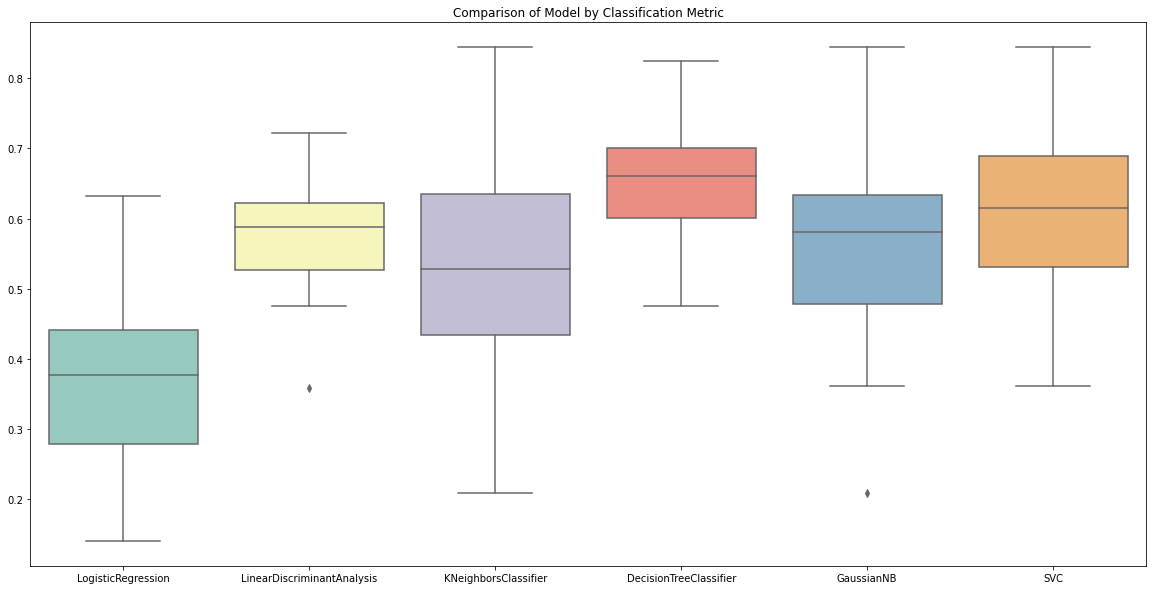

<Figure size 1440x720 with 0 Axes>

In [21]:
# Algorithm Comparison Boxplot

# load dataset
array = train.values
X = array[:,0:8]
Y = array[:,8]

# prepare configuration for cross validation test harness
seed = 7

# prepare models
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('SVC', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure()
#fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
#plt.boxplot(results)
sns.boxplot(data=results, palette="Set3")
ax.set_xticklabels(names)
plt.title('Comparison of Model by Classification Metric')
plt.show()

plt.savefig('../../../0-data/screenshots/benchmark_models_performance.png',dpi=300)



In [22]:
# example run
# Run             & NDCG    &  AW-H     & AW-A      & CF1-H   & CF1-A   & CAcc   & PErr-H & PErr-A \\
# njit-sub01.text & 0.4632  & -0.4801   & -0.2493   & 0.0792  & 0.1582  & 0.9025 & 0.1524 & 0.2198 \\